Shape of the dataset: (3390, 17)
First 5 rows:
    id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD 

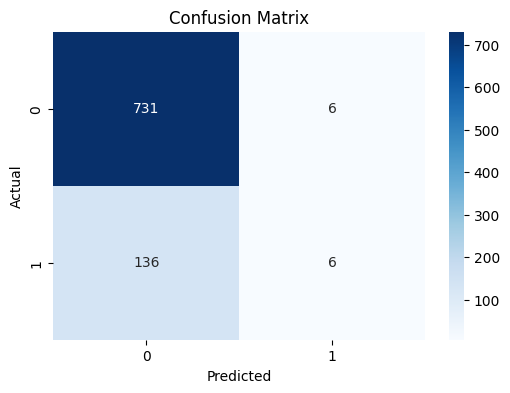

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Data_cardiovascular_risk.csv')
print("Shape of the dataset:", df.shape)
print("First 5 rows:\n", df.head())

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Drop rows with missing values (you could also fill them instead)
df = df.dropna()

# Check column names to find the target column
print("\nColumn names:\n", df.columns)

# Assume 'TenYearCHD' is the target column (update this if named differently in your file)
target_col = 'TenYearCHD'
if target_col not in df.columns:
    raise ValueError("Couldn't find 'TenYearCHD' in dataset. Please check the target column name.")

# Define features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Identify categorical features to be encoded
categorical_features = ['sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']  # Add other categorical columns

# Create a LabelEncoder object and fit it to each categorical feature
label_encoder = LabelEncoder()
for feature in categorical_features:
    X[feature] = label_encoder.fit_transform(X[feature])

# Standardize features after encoding
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()